# Text To CSV

In [61]:
import csv

# Specify the input and output file names
input_file = "input_data/input1.txt"
output_file = "output.csv"

# Read data from the text file
with open(input_file, 'r') as infile:
    # Assuming the file is tab-separated, you can use '\t' as the delimiter
    reader = csv.reader(infile, delimiter='\t')

    # Read the rows from the text file
    data = list(reader)

# Write data to the CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write each row to the CSV file
    writer.writerows(data)

import pandas as pd

# Assuming 'data' is a list of rows from the CSV file
df = pd.DataFrame(data)
display(df)

print(f"Conversion from {input_file} to {output_file} is complete.")

,0
0,Music and health
1,"September 11, 2021"
2,None
3,Music is a fundamental attribute of the human ...
4,None
5,The human brain and nervous system are hard-wi...
6,None
7,Music and the brain
8,"Like any sound, music arrives at the ear in th..."
9,None


Conversion from input_data/input1.txt to output.csv is complete.


In [62]:
import csv
import pandas as pd
import numpy as np

# Specify the input and output file names
input_file = "input_data/input1.txt"
output_file = "output.csv"

# Read data from the text file
with open(input_file, 'r') as infile:
    # Assuming the file is tab-separated, you can use '\t' as the delimiter
    reader = csv.reader(infile, delimiter='\t')

    # Read the rows from the text file
    data = list(reader)


## Create a DataFrame from the data and name the first column as "content"
df = pd.DataFrame(data, columns=['content'] + [f'Column_{i}' for i in range(1, len(data[0]))])

# Extract and store the first line as "title" if its length is less than 30
df['title'] = df.apply(lambda row: row['content'] if (row['content'] is not None and len(row['content']) < 50) else '', axis=1)

# Use the extracted title for every row in the 'title_article' column
df['title_article'] = df['title'].iloc[0]

# Extract and store the date from column 0 if it is a valid date
df['Date'] = pd.to_datetime(df['content'], errors='coerce')

# Replace the "title" with the actual title where a date is found
df.loc[df['Date'].notnull(), 'title'] = ''

# Replace the "title" with the actual title where a date is found
# .loc[df['Date'].notnull(), 'title'] = df['content']

# Forward fill null values in the "title" column
df['title'] = df['title'].replace('', method='ffill')

# Drop rows with null values in the "content" column
df = df.dropna(subset=['content'])

# Drop rows where "content" and "title" columns have the same values
df = df[df['content'] != df['title']]

df.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
df.to_csv(output_file, index=True, header=True)  # Adjust parameters as needed

# Display the DataFrame
display(df)

print(f"Conversion from {input_file} to {output_file} is complete.")

C:\Users\marca\AppData\Local\Temp\ipykernel_16624\593777072.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['content'], errors='coerce')
C:\Users\marca\AppData\Local\Temp\ipykernel_16624\593777072.py:37: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['title'] = df['title'].replace('', method='ffill')


,content,title,title_article,Date
0,"September 11, 2021",Music and health,Music and health,2021-09-11
1,Music is a fundamental attribute of the human ...,Music and health,Music and health,NaT
2,The human brain and nervous system are hard-wi...,Music and health,Music and health,NaT
3,"Like any sound, music arrives at the ear in th...",Music and the brain,Music and health,NaT
4,The cochlea is a busy little world of its own....,Music and the brain,Music and health,NaT
5,"From there, things get even more complicated. ...",Music and the brain,Music and health,NaT
6,Although every healthy human brain can perform...,Music and the brain,Music and health,NaT
7,The neurobiology of music is a highly speciali...,Music and the brain,Music and health,NaT
8,Protect yourself from the damage of chronic in...,Music and the brain,Music and health,NaT
9,"Science has proven that chronic, low-grade inf...",Music and the brain,Music and health,NaT


Conversion from input_data/input1.txt to output.csv is complete.


In [63]:
import csv
import pandas as pd
import os

# Specify the input and output directory
input_directory = "input_data"
output_directory = "output_data"

# List all text files in the input directory
input_files = [f for f in os.listdir(input_directory) if f.endswith('.txt')]

# Loop over each input file
for input_file in input_files:
    # Construct the full path for input and output files
    input_path = os.path.join(input_directory, input_file)
    output_file = os.path.join(output_directory, f"output_{os.path.splitext(input_file)[0]}.csv")

    # Read data from the text file
    with open(input_path, 'r', encoding="utf8") as infile:
        # Assuming the file is tab-separated, you can use '\t' as the delimiter
        reader = csv.reader(infile, delimiter='\t')

        # Read the rows from the text file
        data = list(reader)

    ## Create a DataFrame from the data and name the first column as "content"
    df = pd.DataFrame(data, columns=['content'] + [f'Column_{i}' for i in range(1, len(data[0]))])

    # Extract and store the first line as "title" if its length is less than 40
    df['title'] = df.apply(lambda row: row['content'] if (row['content'] is not None and len(row['content']) < 40) else '', axis=1)

    # Use the extracted title for every row in the 'title_article' column
    df['title_article'] = df['title'].iloc[0]

    # Extract and store the date from column 0 if it is a valid date
    df['Date'] = pd.to_datetime(df['content'], format="%d/%m/%Y", errors='coerce')

    # Replace the "title" with the actual title where a date is found
    df.loc[df['Date'].notnull(), 'title'] = ''

    # Forward fill null values in the "title" column
    df['title'] = df['title'].replace('', None).ffill()

    # Drop rows with null values in the "content" column
    df = df.dropna(subset=['content'])

    # Drop rows where "content" and "title" columns have the same values
    df = df[df['content'] != df['title']]

    df.reset_index(drop=True, inplace=True)

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=True, header=True)  # Adjust parameters as needed

    print(f"Conversion from {input_file} to {output_file} is complete.")

Conversion from input1.txt to output_data\output_input1.csv is complete.
Conversion from input2.txt to output_data\output_input2.csv is complete.
Conversion from input3.txt to output_data\output_input3.csv is complete.
Conversion from input4.txt to output_data\output_input4.csv is complete.


In [64]:
import pandas as pd
import os

# Specify the input and output directory
input_directory = "output_data"
output_file = "combined_output.csv"

# List all CSV files in the input directory
csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop over each CSV file
for csv_file in csv_files:
    # Construct the full path for the CSV file
    csv_path = os.path.join(input_directory, csv_file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)

    # Append the DataFrame to the combined DataFrame
    combined_df = combined_df._append(df, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combination of CSV files is complete. Output saved to {output_file}.")

df.head(10)

Combination of CSV files is complete. Output saved to combined_output.csv.


,Unnamed: 0,content,title,title_article,Date
0,0,"In 2009, archaeologists excavating a cave in s...",Takeaway,The Benefits of Listening to Music,NaN
1,1,Although we can’t be sure exactly when human b...,Takeaway,The Benefits of Listening to Music,NaN
2,2,ResearchersTrusted Source think one of the mos...,Music connects us,The Benefits of Listening to Music,NaN
3,3,Evolutionary scientists say human beings may h...,Music connects us,The Benefits of Listening to Music,NaN
4,4,Music remains a powerful way of uniting people:,Music connects us,The Benefits of Listening to Music,NaN
5,5,national anthems connect crowds at sporting ev...,Music connects us,The Benefits of Listening to Music,NaN
6,6,protest songs stir a sense of shared purpose d...,Music connects us,The Benefits of Listening to Music,NaN
7,7,hymns build group identity in houses of worship,Music connects us,The Benefits of Listening to Music,NaN
8,8,love songs help prospective partners bond duri...,Music connects us,The Benefits of Listening to Music,NaN
9,9,lullabies enable parents and infants to develo...,Music connects us,The Benefits of Listening to Music,NaN


# Main Elastic Search Code

In [65]:
from elasticsearch import Elasticsearch
import certifi

In [66]:
es = Elasticsearch(
    "http://localhost:9200",
    basic_auth=("IDPA","project1"),
)
es.ping()

True

## Prepare the data

In [67]:
import pandas as pd

df = pd.read_csv("combined_output.csv").loc[:499]
df.head()

,Unnamed: 0,content,title,title_article,Date
0,0,Music is a fundamental attribute of the human ...,"September 11, 2021",Music and health,NaN
1,1,The human brain and nervous system are hard-wi...,"September 11, 2021",Music and health,NaN
2,2,"Like any sound, music arrives at the ear in th...",Music and the brain,Music and health,NaN
3,3,The cochlea is a busy little world of its own....,Music and the brain,Music and health,NaN
4,4,"From there, things get even more complicated. ...",Music and the brain,Music and health,NaN


In [68]:
df.isna().value_counts()

Unnamed: 0  content  title  title_article  Date
False       False    False  False          True    147
Name: count, dtype: int64

In [69]:
df.fillna("None", inplace=True)

C:\Users\marca\AppData\Local\Temp\ipykernel_16624\3777244692.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("None", inplace=True)


## Tokenizing keywords

In [70]:
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize

In [71]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
custom_stopwords = [",", ".", ";", ":", "#", "]", "[", "*", "'", '"', '’', '“', '”', '(', ')']

print(stop_words)

{'has', 'for', 'just', 'her', 'same', 'again', 'needn', "that'll", 'me', 'be', 'than', 'hers', 've', 'your', 'themselves', 'having', 'from', 'down', 'ma', 'into', 'over', 'few', 'm', "don't", 'during', 'ours', 'but', 'yours', 'below', 'very', 'or', 'wasn', 'aren', "isn't", 'about', 'i', "you've", 'himself', 'most', 'all', "should've", 'didn', 'does', 'own', 'don', 'until', 'under', 'herself', 'both', 'at', 'those', 'above', 'up', 'mustn', "it's", 'of', "doesn't", "weren't", 'here', 'any', 'whom', "haven't", "mustn't", 'she', 'by', "didn't", "shan't", 'him', 'these', 'some', 'on', 'then', 'won', 'he', 'which', 'only', 'while', 'when', 'if', 'further', 'we', 'the', 'haven', "couldn't", 'there', "wouldn't", 'a', 's', "mightn't", 'them', 'd', 'hasn', 'out', 'in', 'between', "you'll", 'each', 'y', 'my', 'their', 'isn', 'll', 'myself', 'itself', 'should', 'been', 'once', 'they', 'this', 'did', 're', 'so', 'o', "you're", "hadn't", 'off', 'where', 'and', 'hadn', 'theirs', "she's", 'shouldn', '

In [73]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Load combined_output CSV file from the previous part
df = pd.read_csv('combined_output.csv')

# List of columns to tokenize
columns_to_tokenize = ['content', 'title', 'title_article']

# Concatenate the text from selected columns into a single series
combined_columns = df[columns_to_tokenize].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize the combined text
tokens = combined_columns.apply(word_tokenize)

# Optionally, you can remove stopwords
stop_words = set(stopwords.words('english'))

if custom_stopwords:
        stop_words.update(custom_stopwords)
        
filtered_tokens = tokens.apply(lambda token_list: [word for word in token_list if word.lower() not in stop_words])

# Create a Snowball stemmer
stemmer = SnowballStemmer("english")

# Apply stemming to each token in the list
stemmed_tokens = filtered_tokens.apply(lambda token_list: [stemmer.stem(word) for word in token_list])

# Add a new column 'stemmed_text' to the DataFrame
df['stemmed_text'] = stemmed_tokens

# Convert the 'stemmed_text' column of lists into a string
df['stemmed_string'] = df['stemmed_text'].apply(lambda x: ' '.join(map(str, x)))

print(df)

     Unnamed: 0                                            content  \
0             0  Music is a fundamental attribute of the human ...   
1             1  The human brain and nervous system are hard-wi...   
2             2  Like any sound, music arrives at the ear in th...   
3             3  The cochlea is a busy little world of its own....   
4             4  From there, things get even more complicated. ...   
..          ...                                                ...   
142          42  Specially trained music therapists use music t...   
143          43  The American Music Therapy Association describ...   
144          44  Music exerts a powerful influence on human bei...   
145          45  Working with a music therapist is one effectiv...   
146          46           Last medically reviewed on April 1, 2020   

                       title                       title_article  Date  \
0         September 11, 2021                    Music and health   NaN   
1         S

In [74]:
from nltk.stem import SnowballStemmer

class IndexedText(object):

    def __init__(self, language, text):
        self._text = text
        self._stemmer = SnowballStemmer(language)
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))
    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

## Convert the relevant field to Vector using BERT model


In [75]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-mpnet-base-v2')

In [76]:
df["ContentVector"] = df["stemmed_string"].apply(lambda x: model.encode(x))

In [77]:
df.head()

,Unnamed: 0,content,title,title_article,Date,stemmed_text,stemmed_string,ContentVector
0,0,Music is a fundamental attribute of the human ...,"September 11, 2021",Music and health,NaN,"[music, fundament, attribut, human, speci, vir...",music fundament attribut human speci virtual c...,"[0.03664947, 0.047659457, -0.024053393, -0.016..."
1,1,The human brain and nervous system are hard-wi...,"September 11, 2021",Music and health,NaN,"[human, brain, nervous, system, hard-wir, dist...",human brain nervous system hard-wir distinguis...,"[0.01324778, 0.021431528, -0.029397862, -0.023..."
2,2,"Like any sound, music arrives at the ear in th...",Music and the brain,Music and health,NaN,"[like, sound, music, arriv, ear, form, sound, ...",like sound music arriv ear form sound wave ext...,"[-0.0003055716, -0.026745748, -0.00018279918, ..."
3,3,The cochlea is a busy little world of its own....,Music and the brain,Music and health,NaN,"[cochlea, busi, littl, world, fill, fluid, sur...",cochlea busi littl world fill fluid surround 1...,"[-0.020545544, -0.025640873, 0.010686696, -0.0..."
4,4,"From there, things get even more complicated. ...",Music and the brain,Music and health,NaN,"[thing, get, even, complic, studi, use, mri, p...",thing get even complic studi use mri positron ...,"[0.012310253, 0.011910976, -0.020971451, 0.023..."


In [78]:

pd.set_option('display.max_colwidth', 50)
print(df.loc[[0]].ContentVector.describe)

<bound method NDFrame.describe of 0    [0.03664947, 0.047659457, -0.024053393, -0.016...
Name: ContentVector, dtype: object>


## Cosine Similarity

In [79]:
cos_sim = util.cos_sim(df["ContentVector"], df["ContentVector"])
cos_sim

tensor([[1.0000, 0.6507, 0.4464,  ..., 0.6839, 0.4685, 0.3823],
        [0.6507, 1.0000, 0.5843,  ..., 0.6093, 0.4423, 0.3086],
        [0.4464, 0.5843, 1.0000,  ..., 0.4265, 0.3695, 0.1924],
        ...,
        [0.6839, 0.6093, 0.4265,  ..., 1.0000, 0.5956, 0.3164],
        [0.4685, 0.4423, 0.3695,  ..., 0.5956, 1.0000, 0.3605],
        [0.3823, 0.3086, 0.1924,  ..., 0.3164, 0.3605, 1.0000]])

In [80]:
#Add all pairs to a list with their cosine similarity score
all_content_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_content_combinations.append((cos_sim[i][j], i, j))
all_content_combinations  

[(tensor(0.6507), 0, 1),
 (tensor(0.4464), 0, 2),
 (tensor(0.4757), 0, 3),
 (tensor(0.6150), 0, 4),
 (tensor(0.6052), 0, 5),
 (tensor(0.7498), 0, 6),
 (tensor(0.5691), 0, 7),
 (tensor(0.3753), 0, 8),
 (tensor(0.4852), 0, 9),
 (tensor(0.6171), 0, 10),
 (tensor(0.6432), 0, 11),
 (tensor(0.7714), 0, 12),
 (tensor(0.5102), 0, 13),
 (tensor(0.6305), 0, 14),
 (tensor(0.5489), 0, 15),
 (tensor(0.5350), 0, 16),
 (tensor(0.6124), 0, 17),
 (tensor(0.6694), 0, 18),
 (tensor(0.6118), 0, 19),
 (tensor(0.5694), 0, 20),
 (tensor(0.5966), 0, 21),
 (tensor(0.5334), 0, 22),
 (tensor(0.5763), 0, 23),
 (tensor(0.6336), 0, 24),
 (tensor(0.7115), 0, 25),
 (tensor(0.7189), 0, 26),
 (tensor(0.5360), 0, 27),
 (tensor(0.7119), 0, 28),
 (tensor(0.5462), 0, 29),
 (tensor(0.6305), 0, 30),
 (tensor(0.6678), 0, 31),
 (tensor(0.6127), 0, 32),
 (tensor(0.6357), 0, 33),
 (tensor(0.5985), 0, 34),
 (tensor(0.7096), 0, 35),
 (tensor(0.5919), 0, 36),
 (tensor(0.5067), 0, 37),
 (tensor(0.7330), 0, 38),
 (tensor(0.7173), 0, 

In [81]:
#Sort list by the highest cosine similarity score
all_content_combinations = sorted(all_content_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_content_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(df.content[i], df.content[j], cos_sim[i][j]))

Top-5 most similar pairs:
There’s conflicting evidence about whether listening to music has an effect on your body’s physiological stress response, however. One studyTrusted Source indicated that the body releases less cortisol, a stress hormone, when people listen to music. This same study referenced previous research stating that music had little measurable effect on cortisol levels. 	 One recent studyTrusted Source that measured several indicators of stress (not just cortisol) concluded that while listening to music before a stressful event doesn’t reduce anxiety, listening to relaxing music after a stressful event can help your nervous system recover faster. 	 0.9142
A 2021 review of randomized controlled trials (studies in which participants were randomly assigned to a music-based intervention group or a control group), which included 81 trials and 5,576 participants, concluded that in adults with cancer, music interventions may have a large anxiety-reducing effect, a moderately s

## Clustering

In [82]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np


# Corpus with example sentences
corpus_embeddings = model.encode(df.stemmed_string)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [83]:
corpus_embeddings[0]

array([ 3.66494879e-02,  4.76594642e-02, -2.40534004e-02, -1.60037111e-02,
        4.79045957e-02, -1.04359342e-02, -2.57403813e-02,  2.88703591e-02,
        5.09781297e-03,  3.98883224e-02, -2.84406096e-02,  2.70141494e-02,
        2.07550172e-02, -3.59643549e-02,  4.36660312e-02, -7.20235631e-02,
        4.89766710e-03,  1.34032704e-02, -1.71087179e-02,  1.44976908e-02,
       -7.32050315e-02,  1.70755051e-02, -3.75339366e-03,  3.01954057e-02,
        2.15028338e-02, -1.85996462e-02,  3.49211805e-02, -4.58521477e-04,
       -1.92231350e-02, -2.55769584e-02, -3.29303816e-02,  1.45262689e-03,
       -1.23900914e-04,  2.13750713e-02,  1.93387928e-06, -1.92693584e-02,
        4.95787561e-02, -4.10898253e-02,  4.01317695e-04, -2.85976417e-02,
       -1.42283998e-02,  8.13718215e-02, -6.19915724e-02, -1.34093687e-02,
       -4.16529253e-02, -9.50600766e-03, -3.40169035e-02, -4.18234020e-02,
       -1.69097632e-02,  6.02174290e-02,  5.36976208e-04, -2.82309875e-02,
        1.60577241e-02, -

In [84]:
from sklearn.metrics import silhouette_score
best_score = -1
best_clusters = None

for _ in range(10):  # Repeat the clustering process 10 times
    clustering_model = KMeans(n_clusters=5)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    
    # Evaluate the quality of the clusters using the silhouette score
    score = silhouette_score(corpus_embeddings, cluster_assignment)
    
    if score > best_score:
        best_score = score
        best_clusters = cluster_assignment

print("Best clusters:")
print(best_clusters)


d:\LAU\Courses\Year 4 5th Year\Fall 2023\COE 543 IDPA\Project_1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\LAU\Courses\Year 4 5th Year\Fall 2023\COE 543 IDPA\Project_1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\LAU\Courses\Year 4 5th Year\Fall 2023\COE 543 IDPA\Project_1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\LAU\Courses\Year 4 5th Year\Fall 2023\CO

Best clusters:
[2 2 1 1 2 2 2 4 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 4 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 2 1 1 1 1 1 4 4 4 4 4 0 0 0 0 2 0 0 0 2 0 0 0 0 4 2 2 3 2 3 3 3 3 3 3 3
 2 3 2 0 0 0 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 4 2 2 3 2 2 0 0 0 0 2 4 2 0 4]


d:\LAU\Courses\Year 4 5th Year\Fall 2023\COE 543 IDPA\Project_1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [85]:
clustered_content = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_content:
        clustered_content[cluster_id] = []

    clustered_content[cluster_id].append(df.content[sentence_id])
clustered_content

{2: ["Music is a fundamental attribute of the human species. Virtually all cultures, from the most primitive to the most advanced, make music. It's been true through history, and it's true throughout an individual's lifespan. In tune or not, we humans sing and hum; in time or not, we clap and sway; in step or not, we dance and bounce.",
  "The human brain and nervous system are hard-wired to distinguish music from noise and to respond to rhythm and repetition, tones, and tunes. Is this a biologic accident, or does it serve a purpose? It's not possible to say. Still, a varied group of studies suggests that music may enhance human health and performance.",
  'From there, things get even more complicated. Studies using MRI and positron emission tomography (PET) scans suggest that nerve networks in different parts of the brain bear primary responsibility for decoding and interpreting various properties of music. For example, a small area in the right temporal lobe is essential to perceive 

In [86]:
# PCA will allow us to plot the column values which are 5 and since we can only compare 2 columns then use PCA to convert them into 2
from sklearn.decomposition import PCA

# used for plotting
import matplotlib.pyplot as plt

from IPython.display import clear_output

from PIL import Image
import PIL

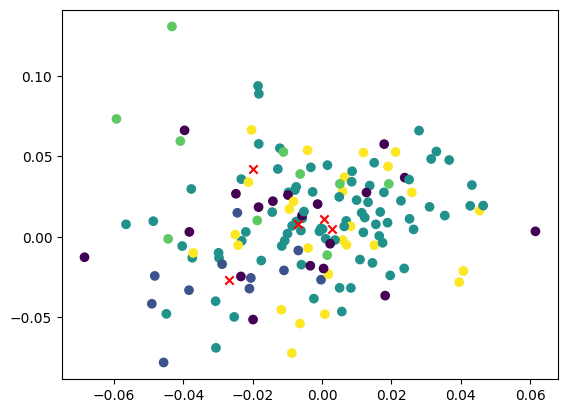

In [87]:
# Create a scatter plot
plt.scatter(corpus_embeddings[:, 0], corpus_embeddings[:, 1], c=clustering_model.labels_)
plt.scatter(clustering_model.cluster_centers_[:, 0], clustering_model.cluster_centers_[:, 1], color = 'red', marker='x')

# Show the plot
plt.show()


In [88]:
from sklearn.metrics import silhouette_score
best_score = -1
best_clusters = None

for _ in range(10):  # Repeat the clustering process 10 times
    clustering_model = AgglomerativeClustering(n_clusters=5)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    
    # Evaluate the quality of the clusters using the silhouette score
    score = silhouette_score(corpus_embeddings, cluster_assignment)
    
    if score > best_score:
        best_score = score
        best_clusters = cluster_assignment

print("Best clusters:")
print(best_clusters)


Best clusters:
[1 1 1 1 1 1 1 0 0 0 1 1 1 2 2 2 2 2 3 0 0 0 0 3 1 2 0 0 0 0 1 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 2 2 2 0 2 1 1 1 2 2 2 0 0 0 0 0 0 2 3 3 3 2 2 2 3 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 3 1 3 1 1 1 1 1 1 1 3 3 1 3 3 1 4 4 4 4 4 0 4
 3 3 3 3 3 3 1 1 1 0 0 0 3 3 3 3 3 3 3 3 2 0 3 3 3 3 3 3 3 3 3 2 0 3 0 0]


In [89]:
clustered_content = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_content:
        clustered_content[cluster_id] = []

    clustered_content[cluster_id].append(df.content[sentence_id])
clustered_content

{1: ["Music is a fundamental attribute of the human species. Virtually all cultures, from the most primitive to the most advanced, make music. It's been true through history, and it's true throughout an individual's lifespan. In tune or not, we humans sing and hum; in time or not, we clap and sway; in step or not, we dance and bounce.",
  "The human brain and nervous system are hard-wired to distinguish music from noise and to respond to rhythm and repetition, tones, and tunes. Is this a biologic accident, or does it serve a purpose? It's not possible to say. Still, a varied group of studies suggests that music may enhance human health and performance.",
  'Like any sound, music arrives at the ear in the form of sound waves. The external ear collects sound waves, and the ear canal funnels them to the eardrum. As the waves strike the eardrum, they cause it to vibrate. The vibrations are relayed along the chain of tiny bones in the middle ear until they reach the third bone, the stapes, 

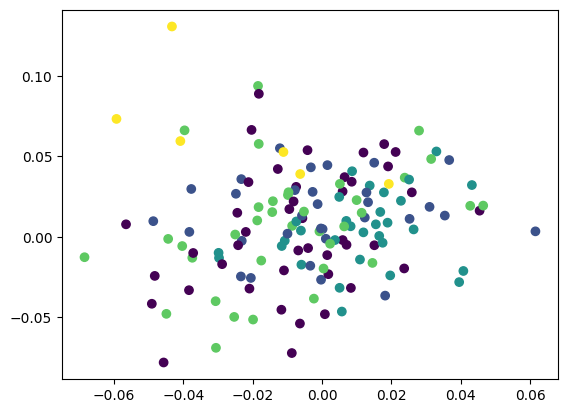

In [90]:
# Create a scatter plot
your_cluster_plot_figure = plt.scatter(corpus_embeddings[:, 0], corpus_embeddings[:, 1], c=clustering_model.labels_)
# Save the plot image to output_data directory
plt.savefig('output_data/plot_image.png')

# Show the plot
plt.show()


In [91]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

## Create new index in ElasticSearch

In [92]:
es.ping()

True

In [93]:
es.indices.delete(index="all_content")

ObjectApiResponse({'acknowledged': True})

In [94]:
from indexMappingFinal import indexMapping
es.indices.create(index="all_content", mappings=indexMapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'all_content'})

## Ingest the data into index

In [95]:
df.fillna("None", inplace=True)

C:\Users\marca\AppData\Local\Temp\ipykernel_16624\3777244692.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("None", inplace=True)


In [96]:
df.isna().value_counts()

Unnamed: 0  content  title  title_article  Date   stemmed_text  stemmed_string  ContentVector
False       False    False  False          False  False         False           False            147
Name: count, dtype: int64

In [97]:
record_list = df.to_dict("records")

In [98]:
for record in record_list:
    try:
        es.index(index="all_content", document=record, id=record["Unnamed: 0"])
    except Exception as e:
        print(e)

In [99]:
es.count(index="all_content")

ObjectApiResponse({'count': 63, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

## Search the data

In [100]:
input_keyword = "How does music impact the brain?"
vector_of_input_keyword = model.encode(input_keyword)

query = {
    "field" : "ContentVector",
    "query_vector" : vector_of_input_keyword,
    "k" : 10,
    "num_candidates" : 10000,
}

res = es.knn_search(index="all_content", knn=query, source=["title_article", "title", "content"])
res["hits"]["hits"]

C:\Users\marca\AppData\Local\Temp\ipykernel_16624\162939045.py:11: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index="all_content", knn=query, source=["title_article", "title", "content"])


[{'_index': 'all_content',
  '_id': '52',
  '_score': 0.64882183,
  '_source': {'content': 'NIH and the John F. Kennedy Center for the Performing Arts, in association with the National Endowment for the Arts, are sponsoring an initiative called Sound Health to increase understanding of music’s effect on the brain and the potential clinical applications. The first Sound Health research projects began in 2019. Some projects are investigating music’s mechanism of action in the brain and how music may be applied to treat symptoms of disorders such as Parkinson’s disease, stroke, and chronic pain. Others are looking at the effects of music on children’s developing brains.',
   'title': 'Tinnitus',
   'title_article': 'Music and Health: What You Need To Know'}},
 {'_index': 'all_content',
  '_id': '19',
  '_score': 0.62343204,
  '_source': {'content': 'Music literally changes the brain. Neurological researchers have found that listening to music triggers the release of several neurochemicals

In [109]:
df.to_csv('output_data/stemmed_strings.csv', index=False)


In [110]:
df1 = pd.read_csv('output_data/stemmed_strings.csv')

In [111]:
df1

,Unnamed: 0,content,title,title_article,Date,stemmed_text,stemmed_string,ContentVector
0,0,Music is a fundamental attribute of the human ...,"September 11, 2021",Music and health,NaN,"['music', 'fundament', 'attribut', 'human', 's...",music fundament attribut human speci virtual c...,[ 3.66494693e-02 4.76594567e-02 -2.40533929e-...
1,1,The human brain and nervous system are hard-wi...,"September 11, 2021",Music and health,NaN,"['human', 'brain', 'nervous', 'system', 'hard-...",human brain nervous system hard-wir distinguis...,[ 1.32477796e-02 2.14315280e-02 -2.93978620e-...
2,2,"Like any sound, music arrives at the ear in th...",Music and the brain,Music and health,NaN,"['like', 'sound', 'music', 'arriv', 'ear', 'fo...",like sound music arriv ear form sound wave ext...,[-3.05571593e-04 -2.67457478e-02 -1.82799180e-...
3,3,The cochlea is a busy little world of its own....,Music and the brain,Music and health,NaN,"['cochlea', 'busi', 'littl', 'world', 'fill', ...",cochlea busi littl world fill fluid surround 1...,[-2.05455441e-02 -2.56408732e-02 1.06866956e-...
4,4,"From there, things get even more complicated. ...",Music and the brain,Music and health,NaN,"['thing', 'get', 'even', 'complic', 'studi', '...",thing get even complic studi use mri positron ...,[ 1.23102535e-02 1.19109759e-02 -2.09714510e-...
...,...,...,...,...,...,...,...,...
142,42,Specially trained music therapists use music t...,It can help manage pain,The Benefits of Listening to Music,NaN,"['special', 'train', 'music', 'therapist', 'us...",special train music therapist use music help a...,[ 2.50831097e-02 3.55127081e-02 -1.44987898e-...
143,43,The American Music Therapy Association describ...,About music therapy,The Benefits of Listening to Music,NaN,"['american', 'music', 'therapi', 'associ', 'de...",american music therapi associ describ music th...,[-8.22372641e-03 2.19163597e-02 -2.75287163e-...
144,44,Music exerts a powerful influence on human bei...,The takeaway,The Benefits of Listening to Music,NaN,"['music', 'exert', 'power', 'influenc', 'human...",music exert power influenc human be boost memo...,[-1.82712469e-02 5.76852784e-02 -1.79267637e-...
145,45,Working with a music therapist is one effectiv...,The takeaway,The Benefits of Listening to Music,NaN,"['work', 'music', 'therapist', 'one', 'effect'...",work music therapist one effect way take advan...,[ 1.79018416e-02 5.75607978e-02 -4.01422195e-...
